# Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Import Data

In [2]:
df= pd.read_csv("50_Startups.csv")
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [4]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [5]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [6]:
df.rename(columns={'R&D Spend':'RD','Marketing Spend':'MS'},inplace=True)

# EDA

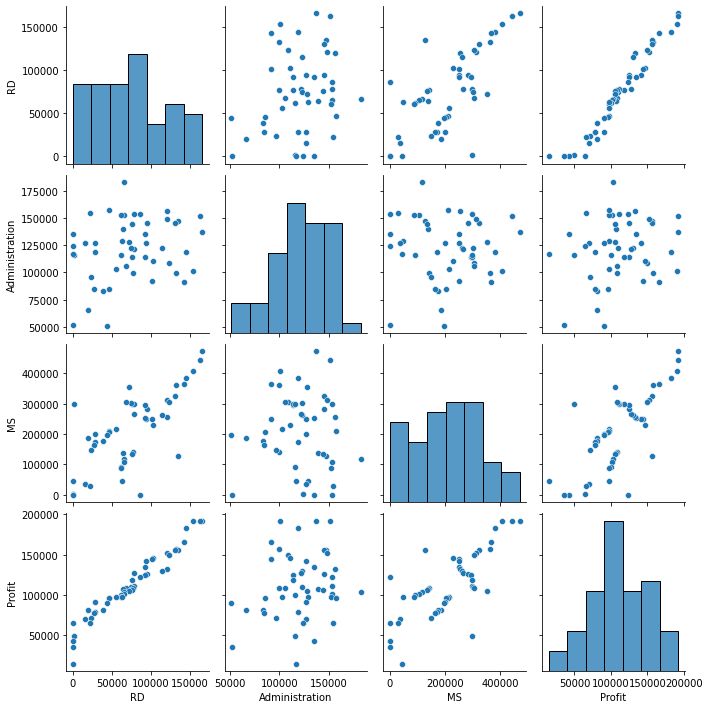

In [7]:
sns.pairplot(df)

There is positive correlation between R&D Spend and Marketing Spend 

In [8]:
df.columns

Index(['RD', 'Administration', 'MS', 'State', 'Profit'], dtype='object')

In [9]:
df.corr()

,RD,Administration,MS,Profit
RD,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
MS,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


<AxesSubplot:>

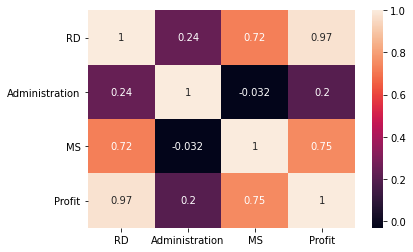

In [10]:
sns.heatmap(df.corr(),annot=True)

c:\users\sanjana\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='RD'>

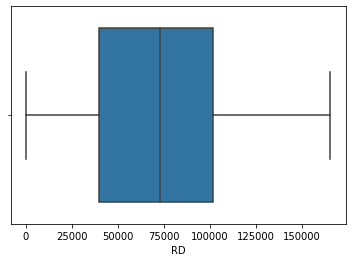

In [11]:
sns.boxplot(df['RD'])

c:\users\sanjana\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Administration'>

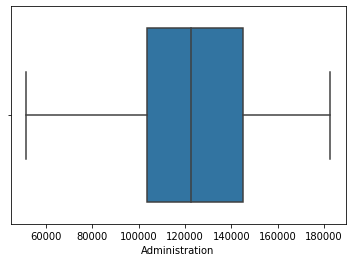

In [12]:
sns.boxplot(df['Administration'])

c:\users\sanjana\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MS'>

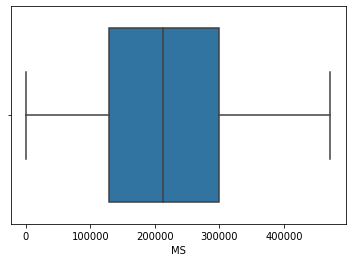

In [13]:
sns.boxplot(df['MS'])

c:\users\sanjana\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Profit'>

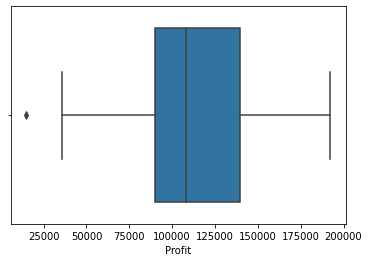

In [14]:
sns.boxplot(df['Profit'])

#There are no outliers in R& D Spend,Marketing Spend and Administration.The median line is at the centre of the box which means there is no skewness in the data.But, there is an outlier in the profit column.The value is less than 25000 which means the company made once very less profit The median line is towards the upper portion of the box which memans there is positive 
skewness in the data.

c:\users\sanjana\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='RD', ylabel='Density'>

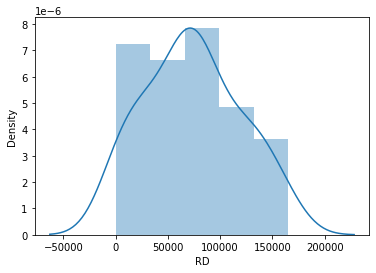

In [15]:
sns.distplot(df['RD'])

c:\users\sanjana\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Administration', ylabel='Density'>

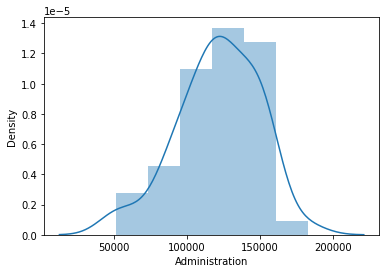

In [16]:
sns.distplot(df['Administration'])

c:\users\sanjana\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MS', ylabel='Density'>

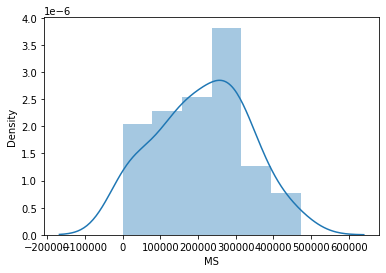

In [17]:
sns.distplot(df['MS'])

c:\users\sanjana\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Profit', ylabel='Density'>

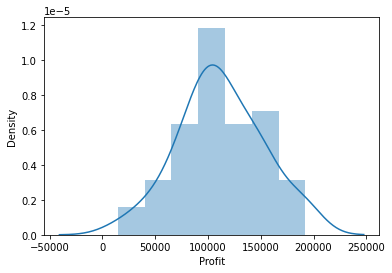

In [18]:
sns.distplot(df['Profit'])

Out of 50 states there are only 3 unique states we choose ONE HOT ENCODING.If we had more number of unique states count we could have used Label Encoding.

In [19]:
df = pd.get_dummies(df, columns=['State'])
df.head()

,RD,Administration,MS,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


<AxesSubplot:>

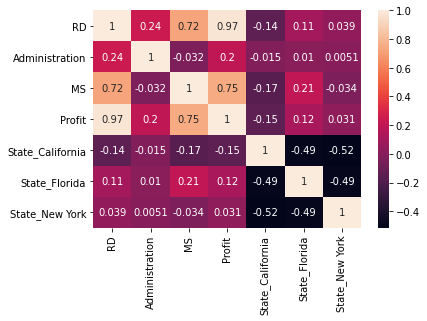

In [20]:
sns.heatmap(df.corr(),annot = True)

In [21]:
df.corr()

,RD,Administration,MS,Profit,State_California,State_Florida,State_New York
RD,1.000000,0.241955,0.724248,0.972900,-0.143165,0.105711,0.039068
Administration,0.241955,1.000000,-0.032154,0.200717,-0.015478,0.010493,0.005145
MS,0.724248,-0.032154,1.000000,0.747766,-0.168875,0.205685,-0.033670
Profit,0.972900,0.200717,0.747766,1.000000,-0.145837,0.116244,0.031368
State_California,-0.143165,-0.015478,-0.168875,-0.145837,1.000000,-0.492366,-0.515152
State_Florida,0.105711,0.010493,0.205685,0.116244,-0.492366,1.000000,-0.492366
State_New York,0.039068,0.005145,-0.033670,0.031368,-0.515152,-0.492366,1.000000


In [22]:
std = StandardScaler()
df_std = std.fit_transform(df)
df_std = pd.DataFrame(df_std, columns = df.columns)

In [23]:
df_std.rename(columns={'State_New York':'State_NewYork'},inplace=True)

In [24]:
df_std.head()

,RD,Administration,MS,Profit,State_California,State_Florida,State_NewYork
0,2.016411,0.560753,2.153943,2.011203,-0.717741,-0.685994,1.393261
1,1.955860,1.082807,1.923600,1.999430,1.393261,-0.685994,-0.717741
2,1.754364,-0.728257,1.626528,1.980842,-0.717741,1.457738,-0.717741
3,1.554784,-0.096365,1.422210,1.776627,-0.717741,-0.685994,1.393261
4,1.504937,-1.079919,1.281528,1.357740,-0.717741,1.457738,-0.717741


In [25]:
model = smf.ols('Profit~RD+Administration+MS+State_California+State_Florida+State_NewYork',data=df_std).fit()

In [26]:
#Coefficients
model.params

Intercept          -5.551115e-16
RD                  9.179307e-01
Administration     -1.877136e-02
MS                  8.185781e-02
State_California   -6.031706e-04
State_Florida       1.730042e-03
State_NewYork      -1.100457e-03
dtype: float64

In [27]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)

Intercept          -1.659260e-14
RD                  1.736858e+01
Administration     -5.170116e-01
MS                  1.573889e+00
State_California   -2.676515e-02
State_Florida       7.490466e-02
State_NewYork      -4.931619e-02
dtype: float64 
 Intercept           1.000000e+00
RD                  2.578772e-21
Administration      6.077373e-01
MS                  1.226769e-01
State_California    9.787681e-01
State_Florida       9.406301e-01
State_NewYork       9.608905e-01
dtype: float64


In [28]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.9507524843355148, 0.945156175737278)

In [29]:
model.summary( )

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Sun, 27 Jun 2021   Prob (F-statistic):           1.34e-27
Time:                        08:27:18   Log-Likelihood:                 4.3255
No. Observations:                  50   AIC:                             3.349
Df Residuals:                      44   BIC:                             14.82
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -5.551e-16      0.033  -1.66e-14      1.000      -0.067       0.067
RD                   0.9179      0.053     17.369      0.000       0.811       1.024
Administration      -0.0188      0.036     -0.517      0.608      -0.092       0.054
MS                   0.0819      0.052      1.574      0.123      -0.023       0.187
State_California    -0.0006      0.023     -0.027      0.979      -0.046       0.045
State_Florida        0.0017      0.023      0.075      0.941      -0.045       0.048
State_NewYork       -0.0011      0.022     -0.049      0.961      -0.046       0.044
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     1.02e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.34e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

#p values are more than 0.05 for Administration, Marketing, State_California, State_Florida and State_NewYork as well.

In [30]:
model_Ad = smf.ols('Profit~Administration',data=df_std).fit()

In [31]:
model_Ad.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.015
Date:                Sun, 27 Jun 2021   Prob (F-statistic):              0.162
Time:                        08:27:18   Log-Likelihood:                -69.919
No. Observations:                  50   AIC:                             143.8
Df Residuals:                      48   BIC:                             147.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -5.274e-16      0.141  -3.73e-15      1.000      -0.284       0.284
Administration     0.2007      0.141      1.419      0.162      -0.084       0.485
==============================================================================
Omnibus:                        0.126   Durbin-Watson:                   0.099
Prob(Omnibus):                  0.939   Jarque-Bera (JB):                0.110
Skew:                           0.093   Prob(JB):                        0.947
Kurtosis:                       2.866   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The p value is 0.162 which is greater than 0.05 and we also saw correlation value between Profit and Administration is very less which is 0.2.
We can say that the Administration variable is not important in predicting the Profit values

In [32]:
model_ms = smf.ols('Profit~MS',data=df_std).fit()

In [33]:
model_ms.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     60.88
Date:                Sun, 27 Jun 2021   Prob (F-statistic):           4.38e-10
Time:                        08:27:18   Log-Likelihood:                -50.470
No. Observations:                  50   AIC:                             104.9
Df Residuals:                      48   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5.274e-16      0.096   -5.5e-15      1.000      -0.193       0.193
MS             0.7478      0.096      7.803      0.000       0.555       0.940
==============================================================================
Omnibus:                        4.420   Durbin-Watson:                   1.178
Prob(Omnibus):                  0.110   Jarque-Bera (JB):                3.882
Skew:                          -0.336   Prob(JB):                        0.144
Kurtosis:                       4.188   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#p-value for Marketing Spend is 0 which is less than 0.05 and also the correlation value between Profit and Marketing Spend is 0.75 so the Profit is actually dependent on Marketing Spend

But when we used Marketing Spend to fit the model the p -value came as 0.123 (greater than 0.05). This means that Marketing Spend individually is affecting the Profit but when it is used by other features it is not. So we can say there is a
multicollinearity problem and we will use VIF futher to check it.

In [34]:
model_rd = smf.ols('Profit~RD',data=df_std).fit()

In [35]:
model_rd.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Sun, 27 Jun 2021   Prob (F-statistic):           3.50e-32
Time:                        08:27:18   Log-Likelihood:                 2.2714
No. Observations:                  50   AIC:                           -0.5428
Df Residuals:                      48   BIC:                             3.281
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5.274e-16      0.033  -1.58e-14      1.000      -0.067       0.067
RD             0.9729      0.033     29.151      0.000       0.906       1.040
==============================================================================
Omnibus:                       13.727   Durbin-Watson:                   1.116
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.536
Skew:                          -0.911   Prob(JB):                     9.44e-05
Kurtosis:                       5.361   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#p-value for R&D Spend is 0 which is less than 0.05 and also the correlation value between Profit and 
R&D Spend is 0.97 so the Profit is actually dependent on R&D Spend

In [36]:
model_sc = smf.ols('Profit~State_California',data=df_std).fit()

In [37]:
model_sc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.043
Date:                Sun, 27 Jun 2021   Prob (F-statistic):              0.312
Time:                        08:27:18   Log-Likelihood:                -70.409
No. Observations:                  50   AIC:                             144.8
Df Residuals:                      48   BIC:                             148.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -5.274e-16      0.143  -3.69e-15      1.000      -0.287       0.287
State_California    -0.1458      0.143     -1.021      0.312      -0.433       0.141
==============================================================================
Omnibus:                        0.079   Durbin-Watson:                   0.073
Prob(Omnibus):                  0.961   Jarque-Bera (JB):                0.190
Skew:                           0.087   Prob(JB):                        0.909
Kurtosis:                       2.753   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#the p-value for State_California is 0.312 which is more than 0.05 and also the correlation value between Profit and 
State_California is -0.15 so the Profit is actually not dependent on State_California variable

In [38]:
model_sf = smf.ols('Profit~State_Florida',data=df_std).fit()

In [39]:
model_sf.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                 -0.007
Method:                 Least Squares   F-statistic:                    0.6575
Date:                Sun, 27 Jun 2021   Prob (F-statistic):              0.421
Time:                        08:27:18   Log-Likelihood:                -70.607
No. Observations:                  50   AIC:                             145.2
Df Residuals:                      48   BIC:                             149.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5.274e-16      0.143  -3.68e-15      1.000      -0.288       0.288
State_Florida     0.1162      0.143      0.811      0.421      -0.172       0.404
==============================================================================
Omnibus:                        0.077   Durbin-Watson:                   0.058
Prob(Omnibus):                  0.962   Jarque-Bera (JB):                0.123
Skew:                           0.080   Prob(JB):                        0.940
Kurtosis:                       2.817   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#The p-value for State_Florida is 0.421 which is more than 0.05 and also the correlation value between Profit and 
State_Florida is 0.12 so the Profit is actually not dependent on State_Florida variable.

In [40]:
model_sny = smf.ols('Profit~State_NewYork',data=df_std).fit()

In [41]:
model_sny.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.020
Method:                 Least Squares   F-statistic:                   0.04727
Date:                Sun, 27 Jun 2021   Prob (F-statistic):              0.829
Time:                        08:27:18   Log-Likelihood:                -70.922
No. Observations:                  50   AIC:                             145.8
Df Residuals:                      48   BIC:                             149.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5.274e-16      0.144  -3.66e-15      1.000      -0.290       0.290
State_NewYork     0.0314      0.144      0.217      0.829      -0.259       0.321
==============================================================================
Omnibus:                        0.011   Durbin-Watson:                   0.021
Prob(Omnibus):                  0.994   Jarque-Bera (JB):                0.082
Skew:                           0.022   Prob(JB):                        0.960
Kurtosis:                       2.807   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#The p-value for State_NewYork is 0.829 which is more than 0.05 and also the correlation value between Profit and 
State_NewYork is 0.031 so the Profit is actually not dependent on State_NewYork variable

Calculating VIF as well to check collinearity

In [42]:
rsq_rd = smf.ols('RD~Administration+MS+State_California+State_Florida+State_NewYork',data=df_std).fit().rsquared  
vif_rd = 1/(1-rsq_rd)

rsq_ad = smf.ols('Administration~RD+MS+State_California+State_Florida+State_NewYork',data=df_std).fit().rsquared  
vif_ad = 1/(1-rsq_ad)

rsq_ms = smf.ols('MS~RD+Administration+State_California+State_Florida+State_NewYork',data=df_std).fit().rsquared  
vif_ms = 1/(1-rsq_ms) 

rsq_sc = smf.ols('State_California~RD+Administration+MS+State_Florida+State_NewYork',data=df_std).fit().rsquared  
vif_sc = 1/(1-rsq_sc)

rsq_sf = smf.ols('State_Florida~RD+Administration+MS+State_California+State_NewYork',data=df_std).fit().rsquared
vif_sf = 1/(1-rsq_sf)

rsq_sny = smf.ols('State_NewYork~RD+Administration+MS+State_California+State_Florida',data=df_std).fit().rsquared  
vif_sny = 1/(1-rsq_sny)




<ipython-input-42-bff05c10710d>:11: RuntimeWarning: divide by zero encountered in double_scalars
  vif_sc = 1/(1-rsq_sc)
<ipython-input-42-bff05c10710d>:14: RuntimeWarning: divide by zero encountered in double_scalars
  vif_sf = 1/(1-rsq_sf)
<ipython-input-42-bff05c10710d>:17: RuntimeWarning: divide by zero encountered in double_scalars
  vif_sny = 1/(1-rsq_sny)


In [43]:
# Storing vif values in a data frame
d1 = {'Features':['RD','Administration','MS','State_California','State_Florida','State_NewYork'],'VIF':[vif_rd,vif_ad,vif_ms,vif_sc,vif_sf,vif_sny]}
Vif_frame = pd.DataFrame(d1)
Vif_frame

,Features,VIF
0,RD,2.495511
1,Administration,1.177766
2,MS,2.416797
3,State_California,inf
4,State_Florida,inf
5,State_NewYork,inf


From the above Simple Regression models and VIF values we can say that the States and Administration are not significant variables forpredicting the Profit values. We will build a model using R&D Spend and Marketing Spend

Simple Linear Regression between Profit and R&D Spend, Marketing Spend

In [44]:
model_rd_m = smf.ols('Profit~RD+MS',data=df_std).fit()

In [45]:
model_rd_m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Sun, 27 Jun 2021   Prob (F-statistic):           2.16e-31
Time:                        08:27:19   Log-Likelihood:                 4.1726
No. Observations:                  50   AIC:                            -2.345
Df Residuals:                      47   BIC:                             3.391
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5.274e-16      0.032  -1.62e-14      1.000      -0.065       0.065
RD             0.9072      0.047     19.266      0.000       0.812       1.002
MS             0.0907      0.047      1.927      0.060      -0.004       0.185
==============================================================================
Omnibus:                       14.677   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.161
Skew:                          -0.939   Prob(JB):                     2.54e-05
Kurtosis:                       5.575   Cond. No.                         2.50
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
(model_ms.rsquared,model_ms.aic)

(0.5591535746115515, 104.94091802371327)

In [47]:
(model_rd.rsquared,model_rd.aic)

(0.9465353160804392, -0.5428445147422991)

Model validation using Residual analysis
Q-Q plot to check normality of errors

c:\users\sanjana\appdata\local\programs\python\python39\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


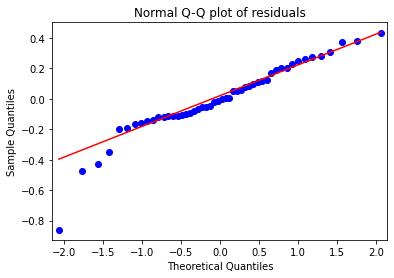

In [48]:
import statsmodels.api as sm
qqplot=sm.qqplot(model_rd.resid,line='q') 
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [49]:
list(np.where(model_rd.resid<-0.8))

[array([49], dtype=int64)]

there is one data point (49th row) that is very far away from the straight line 

In [50]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

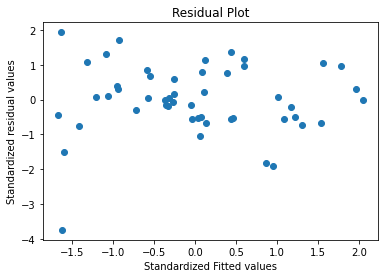

In [51]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

In [52]:
#There is no pattern in the Residual plot, so we can say there is a linear relation and no error variance

Residual Vs Regressors

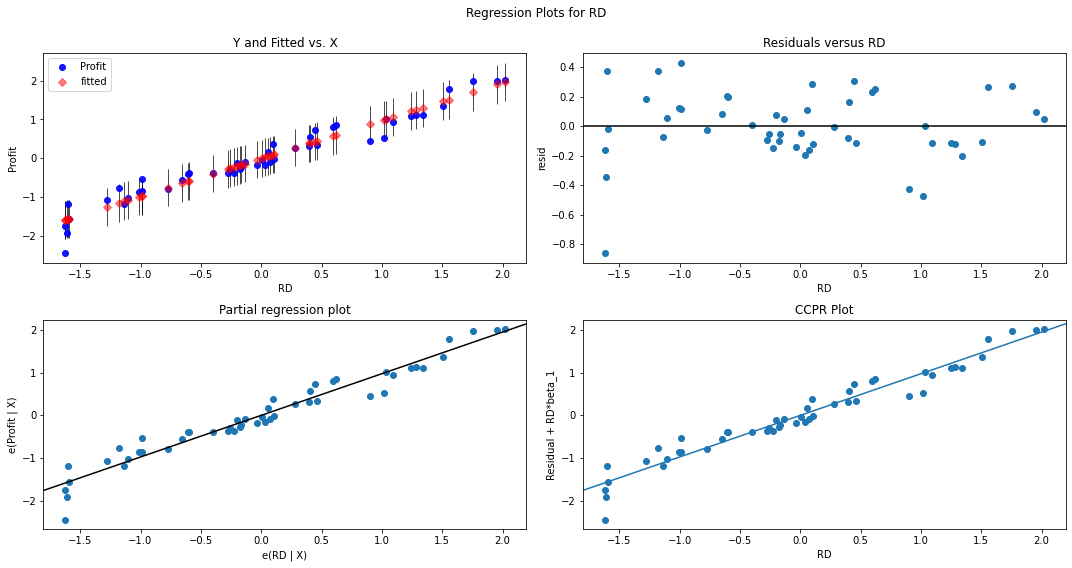

In [53]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model_rd, "RD", fig=fig)
plt.show()

In [54]:
#There is no pattern in the Residual vs R & D Spend plot, so we can say there is a linear relation and no error variance

Model Deletion Diagnostics
Detecting Influencers/Outliers using Cook's distance

In [55]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

In [56]:
(np.argmax(c),np.max(c))

(49, 0.22625094505673166)

In [57]:
df=df_std.drop(df_std.index[[49]],axis=0).reset_index()

In [58]:
final_model= smf.ols('Profit~RD',data = df).fit()

In [59]:
(final_model.rsquared,final_model.rsquared_adj)

(0.9573395972488337, 0.9564319291051918)

In [60]:
new_data=pd.DataFrame({'RD':120000},index=[1])

In [61]:
final_model.predict(new_data)

1    113133.374814
dtype: float64

In [62]:
#For a R&D Spend value of 120000, we will have a Profit of 113133.374814 approx